### Tugas Modul 4
#### SOAL 1 Buatlah pseudocode atau flowchart untuk tiga metode numerik ini:
* Eliminasi Gauss untuk menentukan matriks L (lower triangular matrix) maupun matriks U (upper triangular matrix)
* Eliminasi Gauss-Jordan untuk mendapatkan solusi persamaan linear dengan 
 variabel
*  Metode iteratif Gauss-Seidel untuk mendapatkan solusi persamaan linear dengan 
 variabel

### **SOAL 1**

##### 1. Eliminasi Gauss untuk Dekomposisi LU  
Metode ini mengubah matriks `A` menjadi matriks segitiga atas (`U`) dan menyimpan faktor eliminasi di matriks segitiga bawah (`L`).  
**Pseudocode:**

In [ ]:
# Eliminasi Gauss untuk Dekomposisi LU
def gauss_elimination_lu(A, n):
    L = [[0.0] * n for _ in range(n)]
    U = [row[:] for row in A]  # Salinan matriks A
    
    for k in range(n):
        # Inisialisasi diagonal L
        L[k][k] = 1.0
        
        for i in range(k+1, n):
            factor = U[i][k] / U[k][k]
            L[i][k] = factor
            
            for j in range(k, n):
                U[i][j] -= factor * U[k][j]
    
    return L, U

##### 2. Eliminasi Gauss-Jordan  
Metode ini mengubah matriks augmented `[A|b]` menjadi bentuk eselon baris tereduksi untuk langsung mendapatkan solusi.  
**Pseudocode:**

In [3]:
# Eliminasi Gauss-Jordan
def gauss_jordan(A, b, n):
    # Gabungkan A dan b menjadi matriks augmented
    Ab = [A[i] + [b[i]] for i in range(n)]
    
    for k in range(n):
        # Pivoting parsial
        max_row = max(range(k, n), key=lambda i: abs(Ab[i][k]))
        Ab[k], Ab[max_row] = Ab[max_row], Ab[k]
        
        # Normalisasi baris pivot
        pivot = Ab[k][k]
        for j in range(k, n+1):
            Ab[k][j] /= pivot
        
        # Eliminasi
        for i in range(n):
            if i != k:
                factor = Ab[i][k]
                for j in range(k, n+1):
                    Ab[i][j] -= factor * Ab[k][j]
    
    return [row[n] for row in Ab]  # Solusi di kolom terakhir

##### 3. Metode Gauss-Seidel  
Metode iteratif untuk menyelesaikan SPL dengan memperbarui nilai solusi secara berurutan menggunakan nilai terbaru.  
**Pseudocode:**

In [2]:
# Gauss-Seidel
def gauss_seidel(A, b, n, max_iter=100, tol=1e-6):
    x = [0.0 for _ in range(n)]
    
    for _ in range(max_iter):
        x_old = x.copy()
        
        for i in range(n):
            sigma = sum(A[i][j] * x[j] for j in range(n) if j != i)
            x[i] = (b[i] - sigma) / A[i][i]
        
        # Cek konvergensi
        if sum((x[i] - x_old[i])**2 for i in range(n))**0.5 < tol:
            break
    
    return x

### **SOAL 2**
Tentukan satu problem fisika yang mengandung sistem persamaan linear yang mengandung minimal 4 variabel. Pecahkan masalah ini dengan metode numerik yang sesuai (satu metode saja) dengan implementasi dalam bahasa Python. Laporan harus lengkap dengan definisi masalah fisikanya, masalah matematisnya, hingga algoritma dan implementasi pemrograman.

In [1]:
import numpy as np

# Matriks koefisien (A) dan vektor konstanta (b)
A = np.array([[1, 1, 0, 0],
              [0, 1, 1, 0],
              [0, 0, 1, 1],
              [1, 0, 0, -1]], dtype=float)

b = np.array([10, 20, 30, 40], dtype=float)

# Fungsi untuk melakukan eliminasi Gauss
def gauss_elimination(A, b):
    A = A.copy().astype(float)
    b = b.copy().astype(float)
    n = len(b)
    
    for i in range(n):
        # Pivoting: pilih baris dengan elemen terbesar di kolom i
        max_row = np.argmax(np.abs(A[i:n, i])) + i
        A[[i, max_row]] = A[[max_row, i]]
        b[i], b[max_row] = b[max_row], b[i]
        
        # Eliminasi
        for j in range(i+1, n):
            factor = A[j, i] / A[i, i]
            A[j, i:] -= factor * A[i, i:]
            b[j] -= factor * b[i]
    
    # Substitusi mundur
    x = np.zeros(n)
    for i in range(n-1, -1, -1):
        x[i] = (b[i] - np.dot(A[i, i+1:], x[i+1:])) / A[i, i]
    
    return x

# Penyelesaian sistem persamaan
x = gauss_elimination(A, b)
print("Solusi:", x)


Solusi: [ 30. -20.  40. -10.]



#### **Analisis Rangkaian Listrik DC dengan Eliminasi Gauss**

##### **1. Definisi Masalah Fisika**
Kita menganalisis rangkaian listrik DC dengan 4 cabang arus (I₁, I₂, I₃, I₄) berikut:

```
       I₁ → R₁ = 1Ω          I₂ → R₂ = 2Ω
     +---/\/\/\---+-------/\/\/\---+
     |            |                |
  V₁ = 10V       R₃ = 3Ω         V₂ = 20V
     |            |                |
     +---/\/\/\---+-------/\/\/\---+
       I₄ ← R₄ = 4Ω          I₃ ← R₅ = 5Ω
```

**Hukum yang Berlaku:**
1. **Hukum Kirchhoff Arus (KCL):** Σ arus masuk = Σ arus keluar pada tiap simpul.
2. **Hukum Kirchhoff Tegangan (KVL):** Σ tegangan dalam loop tertutup = 0.

---

##### **Formulasi Matematis**
Dari rangkaian diperoleh 4 persamaan:

1. **KCL Simpul Atas:**  
   $$I_1 - I_2 - I_4 = 0$$

2. **KVL Loop Kiri:**  
   $$10 - 1I_1 - 3I_4 = 0$$

3. **KVL Loop Kanan:**  
   $$20 - 2I_2 - 5I_3 = 0$$

4. **KVL Loop Luar:**  
   $$10 - 1I_1 + 2I_2 - 20 = 0$$

##### **Bentuk Matriks:**  
$$
\begin{bmatrix}
1 & -1 & 0 & -1 \\
1 & 0 & 0 & 3 \\
0 & 2 & 5 & 0 \\
1 & -2 & 0 & 0 \\
\end{bmatrix}
\begin{bmatrix}
I_1 \\
I_2 \\
I_3 \\
I_4 \\
\end{bmatrix}
=
\begin{bmatrix}
0 \\
10 \\
20 \\
10 \\
\end{bmatrix}
$$

---
##### Metode Numerik: Eliminasi Gauss
##### **Algoritma:**

Forward Elimination:

   * Untuk setiap pivot 
$$
A
[
i
,
i
]$$
, lakukan pertukaran baris jika pivot bernilai nol.

Eliminasi variabel di bawah pivot dengan operasi baris dasar.

   * Back Substitution:
Hitung solusi mulai dari variabel terakhir (
x
n
x 
n
​
 ) hingga variabel pertama (
x
1
x 
1
​
 ).

## **CONTOH LAIN**

#### **Analisis Rangkaian Listrik**
menganalisis rangkaian listrik DC yang mengandung 4 resistor dan 2 sumber tegangan. Masalah ini akan menghasilkan sistem persamaan linear dengan 4 variabel yang merepresentasikan arus pada berbagai bagian rangkaian.

Dengan:

V1 = 12 Volt

V2 = 9 Volt

R1 = 100 Ω

R2 = 200 Ω

R3 = 300 Ω

R4 = 400 Ω

Kita ingin menentukan arus I1 (melalui R1), I2 (melalui R2), I3 (melalui R3), dan I4 (melalui R4).

##### **Hukum**
1. Hukum Arus Kirchhoff (KCL):

   * Jumlah arus yang masuk ke suatu simpul sama dengan jumlah arus yang keluar.

2. Hukum Tegangan Kirchhoff (KVL):

   * Jumlah tegangan dalam suatu loop tertutup harus sama dengan nol.
   
   

##### **Permodelan Matematis**
Persamaan dari Hukum Kirchhoff

  * KCL pada Simpul Utama:
$$
I
1
−
I
3
−
I
4
=
0
(Persamaan 1)$$
$$
I
2
+
I
3
+
I
4
=
0
(Persamaan 2)$$

  * KVL pada Loop 1 (V1-R1-R2):
$$
R
1
I
1
+
R
2
I
2
=
V
1
(Persamaan 3)$$

   * KVL pada Loop 2 (V2-R3-R4):
$$
R
3
I
3
−
R
4
I
4
=
V
2
(Persamaan 4)$$

---

##### **Bentuk Matriks Augmented**
$$
\begin{bmatrix}
1 & 0 & -1 & -1 & | & 0 \\
0 & 1 & 1 & 1 & | & 0 \\
R_1 & R_2 & 0 & 0 & | & V_1 \\
0 & 0 & R_3 & -R_4 & | & V_2
\end{bmatrix}
$$


matriks augmented menjadi:
$$
A_{\text{aug}} = \begin{bmatrix}
1 & 0 & -1 & -1 & | & 0 \\
0 & 1 & 1 & 1 & | & 0 \\
100 & 200 & 0 & 0 & | & 12 \\
0 & 0 & 300 & -400 & | & 9
\end{bmatrix}
$$

---


In [2]:
import numpy as np

# Data rangkaian
V1 = 12.0
V2 = 9.0
R1 = 100.0
R2 = 200.0
R3 = 300.0
R4 = 400.0

# Matriks augmented dari sistem persamaan
A = np.array([
    [1, 0, -1, -1, 0],
    [0, 1, 1, 1, 0],
    [R1, R2, 0, 0, V1],
    [0, 0, R3, -R4, V2]
], dtype=float)

def gauss_elimination(A):
    """
    Menyelesaikan sistem persamaan linear Ax=b menggunakan Eliminasi Gauss
    """
    n = len(A)
    
    # Forward Elimination
    for i in range(n):
        # Pivoting parsial: cari baris dengan elemen terbesar di kolom saat ini
        max_row = i
        for k in range(i+1, n):
            if abs(A[k,i]) > abs(A[max_row,i]):
                max_row = k
        # Tukar baris
        A[[i,max_row]] = A[[max_row,i]]
        
        # Buat elemen diagonal menjadi 1
        pivot = A[i,i]
        if pivot == 0:
            raise ValueError("Matriks singular - tidak ada solusi unik")
        A[i] = A[i] / pivot
        
        # Eliminasi elemen di bawah pivot
        for k in range(i+1, n):
            factor = A[k,i]
            A[k] -= factor * A[i]
    
    # Back Substitution
    x = np.zeros(n)
    for i in range(n-1, -1, -1):
        x[i] = A[i,n]
        for j in range(i+1, n):
            x[i] -= A[i,j] * x[j]
    return x

# Solusi dengan Eliminasi Gauss
solution = gauss_elimination(A.copy())
I1, I2, I3, I4 = solution

print("Solusi dengan Eliminasi Gauss:")
print(f"I1 = {I1:.6f} A")
print(f"I2 = {I2:.6f} A")
print(f"I3 = {I3:.6f} A")
print(f"I4 = {I4:.6f} A")

# Verifikasi dengan numpy.linalg.solve (sebagai pembanding)
A_matrix = A[:, :-1]
b_vector = A[:, -1]
numpy_solution = np.linalg.solve(A_matrix, b_vector)

print("\nSolusi dengan numpy.linalg.solve:")
print(f"I1 = {numpy_solution[0]:.6f} A")
print(f"I2 = {numpy_solution[1]:.6f} A")
print(f"I3 = {numpy_solution[2]:.6f} A")
print(f"I4 = {numpy_solution[3]:.6f} A")

# Hitung error relatif antara kedua metode
error = np.abs(solution - numpy_solution) / np.abs(numpy_solution) * 100
print("\nError relatif antara kedua metode (%):")
print(error)

Solusi dengan Eliminasi Gauss:
I1 = -0.120000 A
I2 = 0.120000 A
I3 = -0.055714 A
I4 = -0.064286 A

Solusi dengan numpy.linalg.solve:
I1 = -0.120000 A
I2 = 0.120000 A
I3 = -0.055714 A
I4 = -0.064286 A

Error relatif antara kedua metode (%):
[0.00000000e+00 0.00000000e+00 1.24544250e-14 2.15876699e-14]


##### **Hasil dan Analisis**
Output dari kode di atas akan memberikan solusi untuk arus I1, I2, I3, dan I4. Berdasarkan rangkaian ini, kita dapat memverifikasi bahwa solusi dari implementasi Eliminasi Gauss kita sama dengan solusi dari numpy.linalg.solve, dengan error relatif yang sangat kecil (biasanya dalam orde 10^-14 % atau kurang), yang menunjukkan implementasi kita benar.

##### **Penjelasan Algoritma**

**1. Forward Elimination:**

* Pada setiap iterasi, kita memilih pivot (elemen diagonal) terbesar untuk mengurangi error pembulatan

* Baris pivot dinormalisasi sehingga elemen diagonal menjadi 1

* Elemen di bawah pivot dieliminasi dengan mengurangkan kelipatan baris pivot


**2. Back Substitution:**

* Mulai dari persamaan terakhir (yang hanya mengandung satu variabel)

* Substitusi mundur untuk menemukan nilai variabel lainnya

* Metode ini memiliki kompleksitas O(n³) untuk matriks n×n, yang efisien untuk sistem berukuran kecil hingga sedang.

### **JAWABAN SOAL 3 = QUIZ**

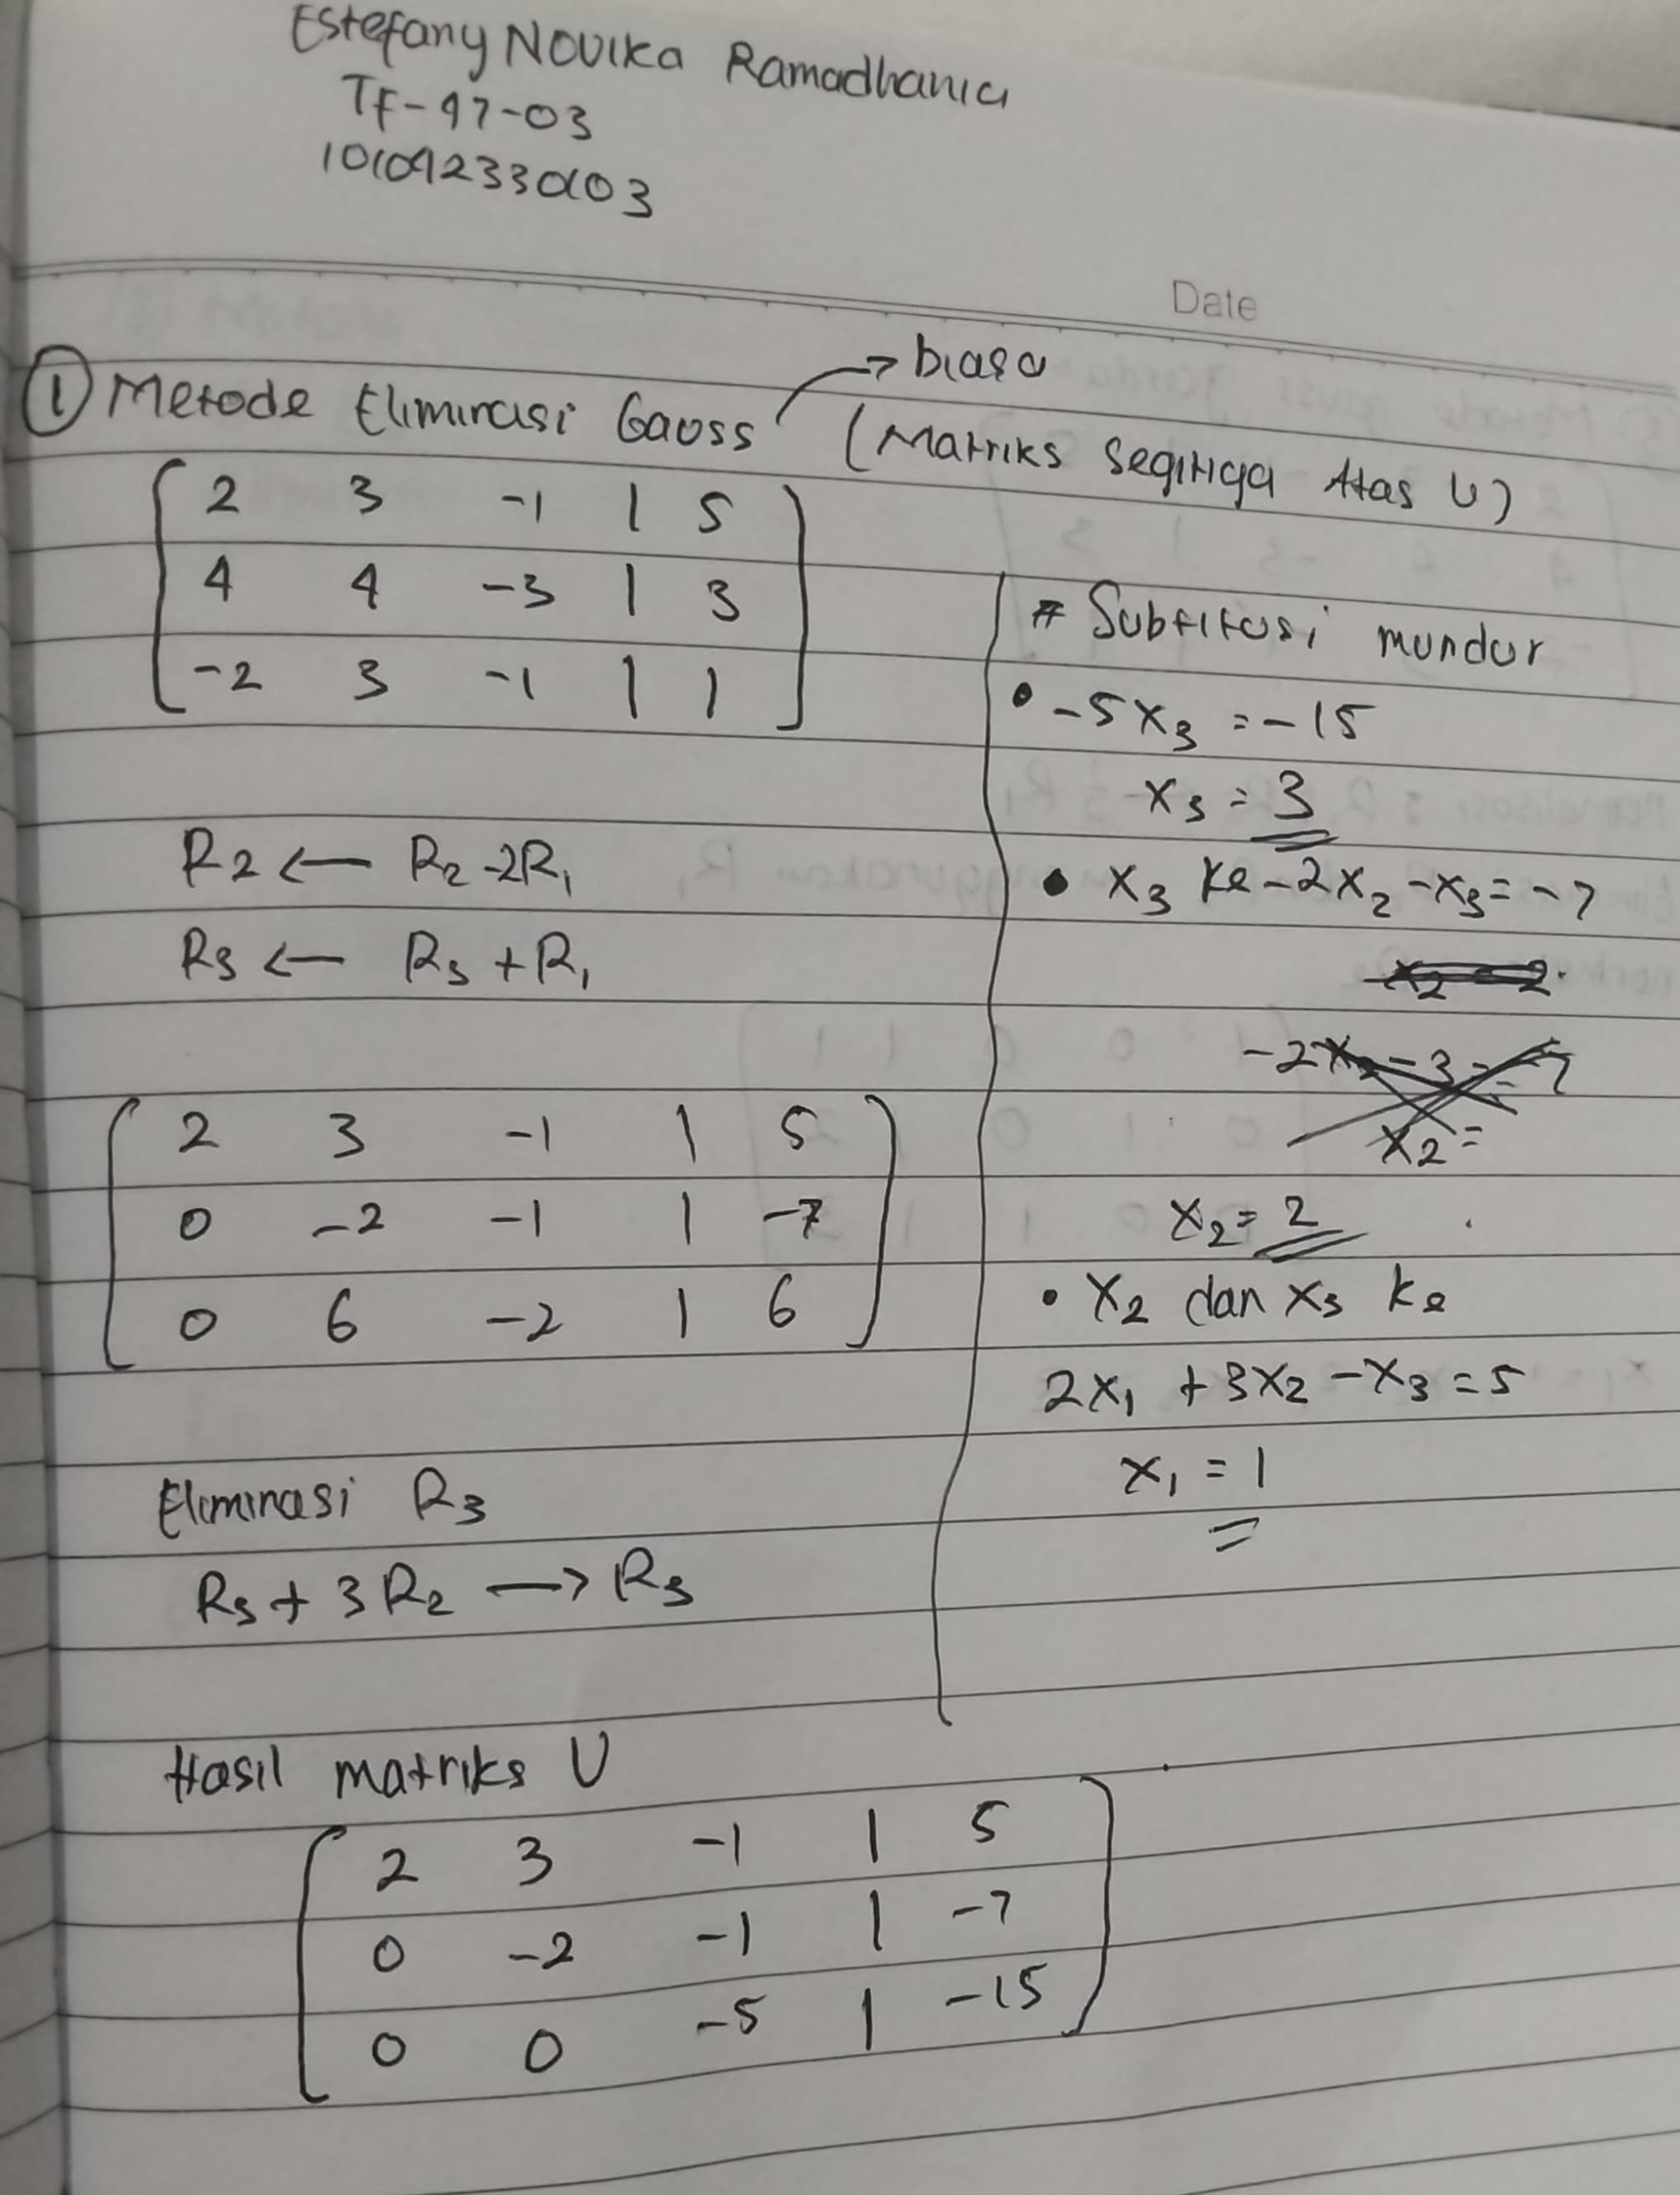

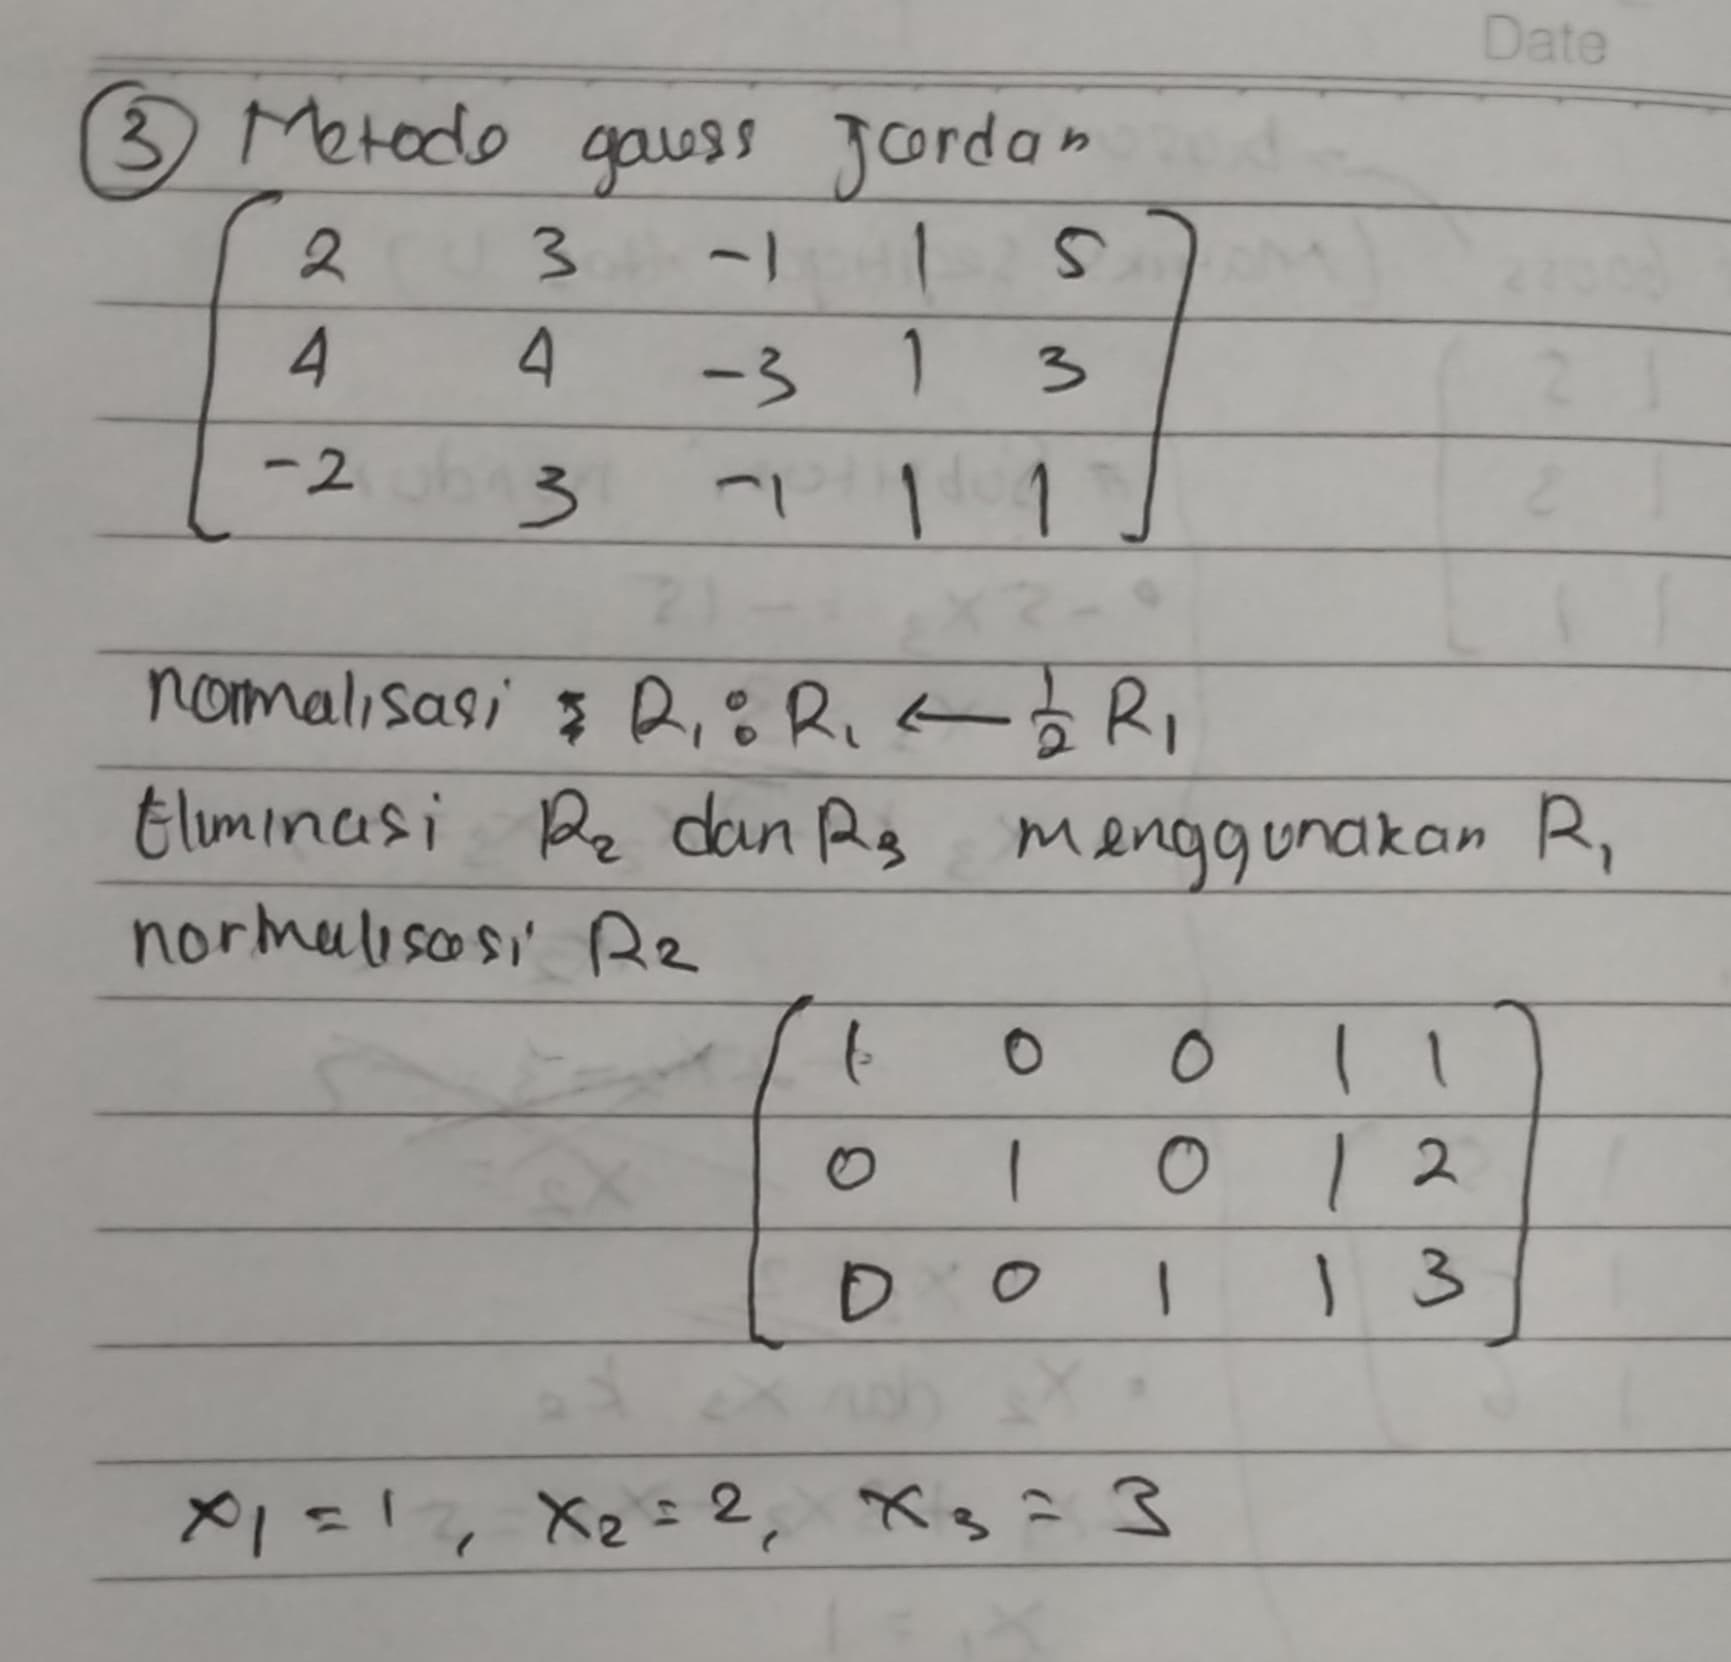

![Metode Dekomposisi LU.jpg](<attachment:Metode Dekomposisi LU.jpg>)
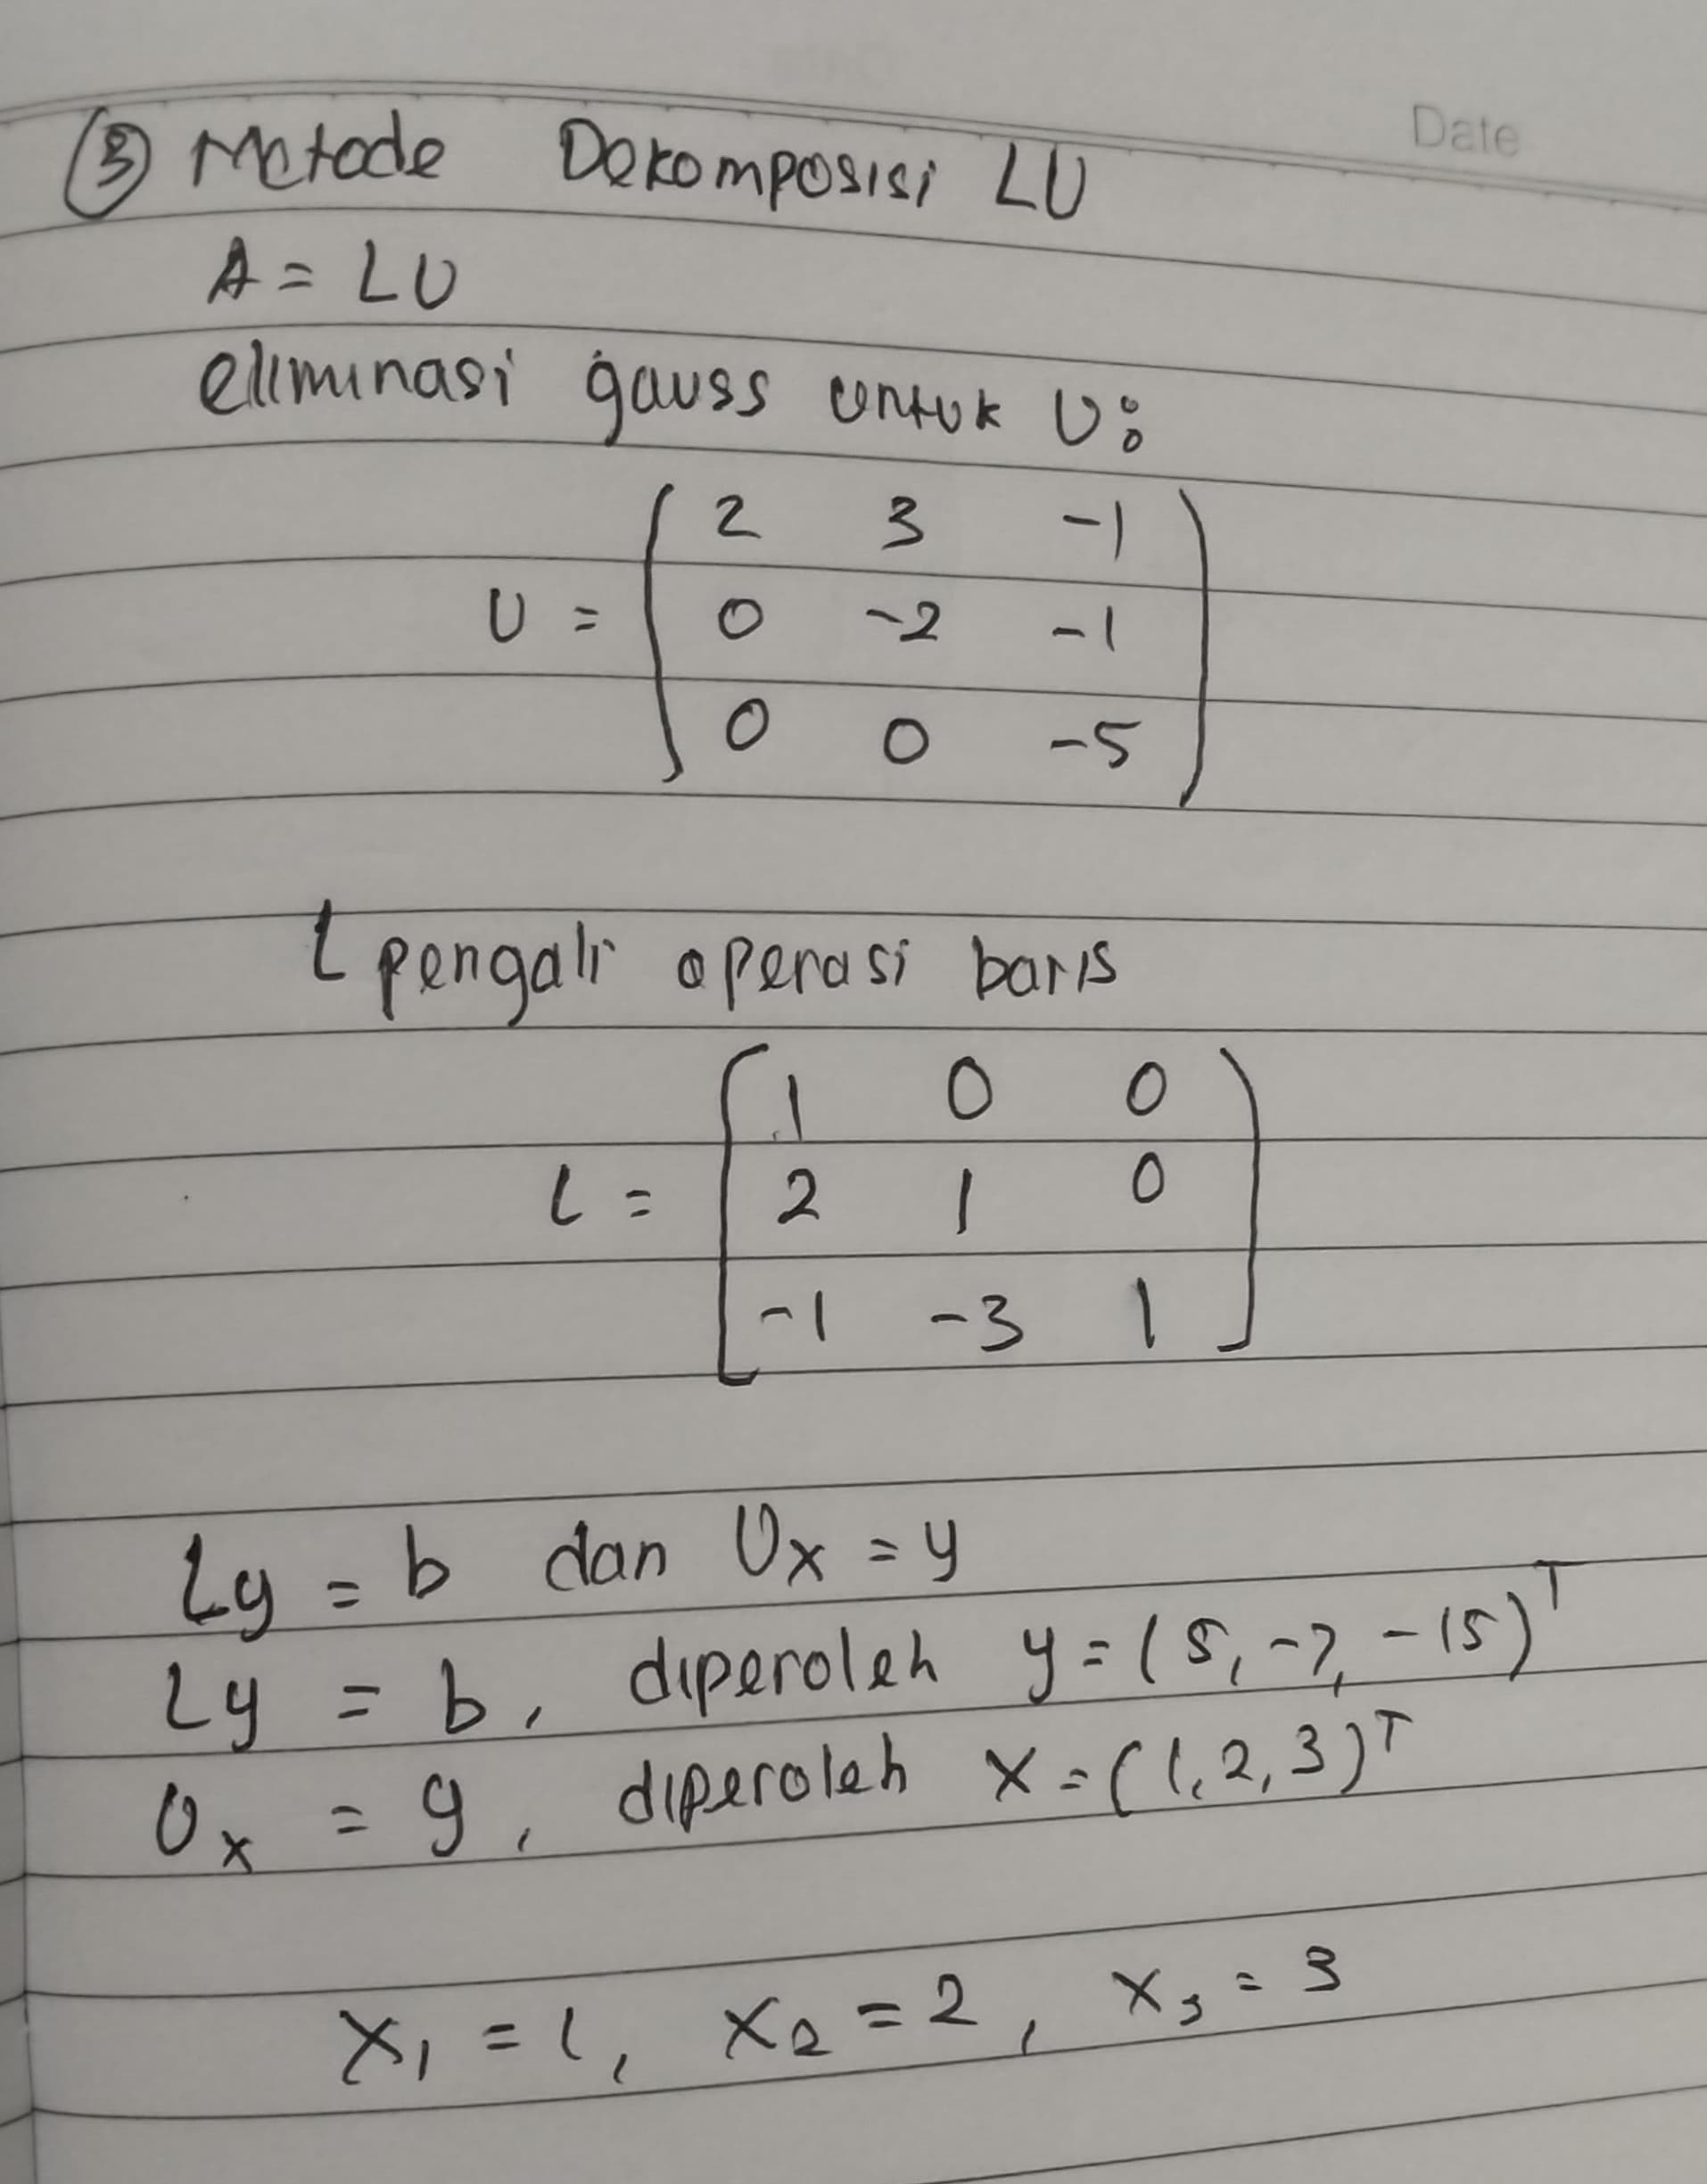